<a href="https://colab.research.google.com/github/veeralakshmi-coder/FMML-2024/blob/main/Regression_M6_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Lab 2: Loss Functions



```
Module Coordinator : Akshit Garg
```


## Motivation

The main goal of machine learning tasks is to "learn" something about data we feed to our models. But how does the model actually learn anything? To understand this, we need to first understand what objective functions are.

Mathematically, objective functions are a function whose values we desire to minimize/maximize. In the context of machine learning, the objective is commonly referred to as a **loss function**. Loss functions indicate how well the model is doing on the dataset.

The value of the objective function is simply called **loss**. Our goal is to eventually find the best model parameters that has the least average loss on the data after training.


We are familiar with the idea of **error** from the linear regression lab. RMSE is a common loss function used in machine learning. However, there are many other loss functions employed, depending on what the task is (classification, regression etc.). In this lab, we will take a look at some common loss functions, and understand why they are used where they are.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# interactive visualization

# 1. Regression


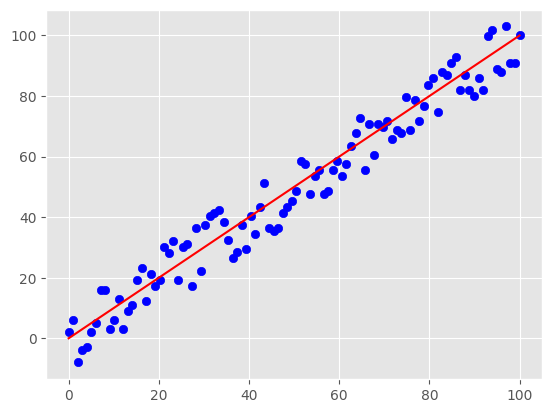

In [2]:
# initializing random data

np.random.seed(0)
x = np.linspace(0,100,100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10,10,100)

plt.plot(x,y_actual,color="red")
plt.scatter(x,y_pred,color="blue")
plt.show()

### Mean Squared Error

As we have seen before, the formula for MSE is

$MSE = \frac{1}{m} \sum_{i=1}^n (y-y_p)^2$

The image below depicts a visualization of what the squared error is.

<img src="https://drive.google.com/uc?export=view&id=12jmqRrrqknIWKhwRpgRIJAErBjkEcyx9" width="350" height="350" align="middle"/>

MSE is also referred to as L2 loss.

Typically, we would want the units of error to be the same as the data, so we use Root Mean Squared Error instead.



In [3]:
mse = np.mean((y_actual-y_pred)**2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

MSE is: 38.68
RMSE is: 6.219324722186485


### Mean Absolute Error

$MAE = \frac{1}{m} \sum_{i=1}^n |y-y_p|$

MAE is also commonly referred to as L1 loss.

In [4]:
mae = np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))

MAE is: 5.5


MSE penalizes the model for making large errors by squaring the difference. However, this also means that MSE cannot handle outliers well, since they would throw the model off.

On the other hand, MAE is robust to outliers. But, MAE is non-differentiable, making it difficult to perform mathematical operations on it.

Hence, RMSE is most commonly used as a metric for evaluation.

# 2. Classification

Classification tasks involve some data, along with labels assigned to that data. For example, we may have pictures of cats and dogs, and the corresponding labels assigned to those images. We then want to train a model that can predict a label for some input image belonging to either label class (cat or dog).

## The concept of maximum likelihood

Ideally, we would want to obtain a model $\hat{\theta}$ which maximizes the probability of correctly predicting data. Mathematically, the likelihood is:

$ \prod_{i=1}^{N}  \: \hat{\theta_i}^{\theta_i}$

This is because our actual data ($\theta_i$) is either 0 or 1 depending on the label of the data, and our predicted data ($\hat{\theta_i}$) is a probability.

We usually consider the negative log of the likelihood, since log is monotonic and easier to deal with as an optimization problem.

Hence, we have

$MLE = $ arg min $\: - \sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$

\


## Entropy and Cross-Entropy

For some event $x$, we can obtain **information** based on its probability distribution. For example, for some event that occurs with $p=1$, we gain no information. Now, if we flip a coin and see that we obtained heads, we say that we got 1 bit of information.

Thus, the information $I$ of some event $x$ is:

$I = -log_2 \: p(x)$

We say that events with a low probability of occuring give high information, and those with a low probability give low information.

Now, if we have some random variable $X$, its **entropy** is the expected value of the information obtained.

$H(x) = - \sum_{k} p_k \: log \: p_k$

Now, suppose we are trying to correctly predict labels of some data. Let P be the true distribution of the labels, and Q be the predicted distribution of labels.

Cross-Entropy is then defined as:

$H(P,Q) = - \sum_{x} P(x)\: log \: Q(x)$

which is basically the entropy between two probability distributions over the same events.

\


## MLE and Cross-Entropy

So, in the case of classification, the equation for minimization of the cross-entropy between the actual data and the predicted data would be:

arg min $\: -\sum_{i=1}^{N} P(x) \: log \: Q(x)$

$= $ arg min $\: -\sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$


which is exactly the same as what we had obtained for minimizing the negative log likelihood. Hence, the two problems are equivalent.

1/1+e^(-x)

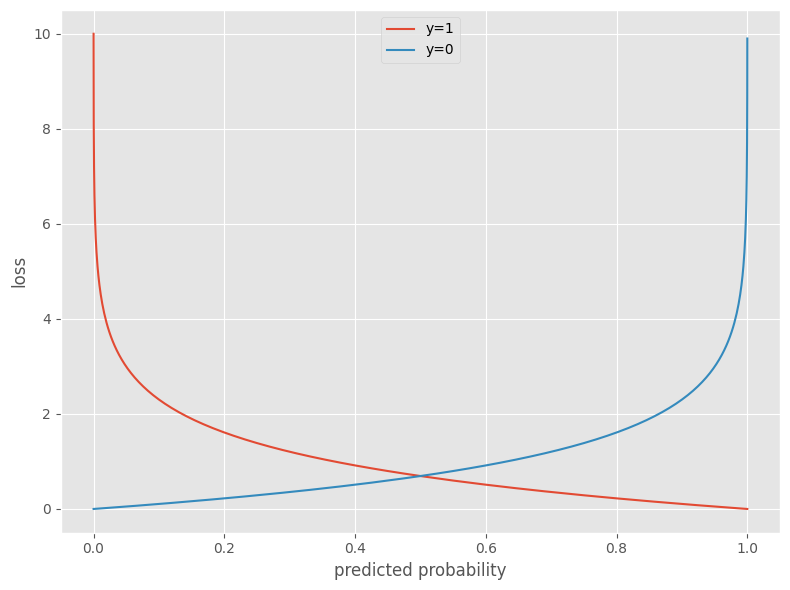

In [5]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def cross_entropy_loss(y_,y):
  if y==1:
    return -np.log(y_)

  return -np.log(1-y_)

z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='y=1')
plt.plot(h_z, cost_0, label='y=0')
plt.xlabel('predicted probability')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## KNN-regression

Till now, we have studied KNN as a classification algorithm, which uses feature similarity and voting to decide the class labels of unseen data.

For regression, we use the same idea: We take the y-values of the k nearest neighbours, and compute their average, which is our predicted y-value. We do this for every x whose value we want to predict.

In the visualization below, we have k=3, and the red dots are the new x-values whose output we want to predict.

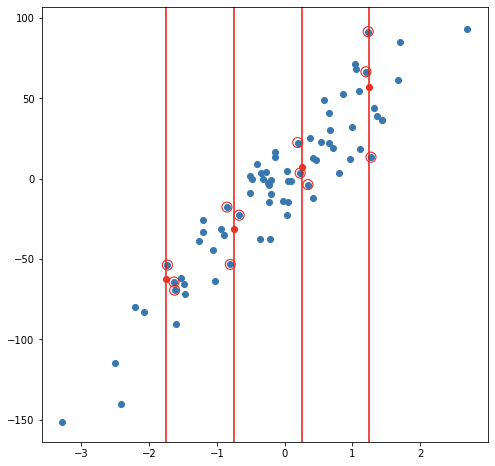

In [6]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [7]:
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"

train = pd.read_csv(train_path)

In [8]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

<ipython-input-8-16fc6f082614>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(mean_weight,inplace=True)
<ipython-input-8-16fc6f082614>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [9]:
train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [11]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

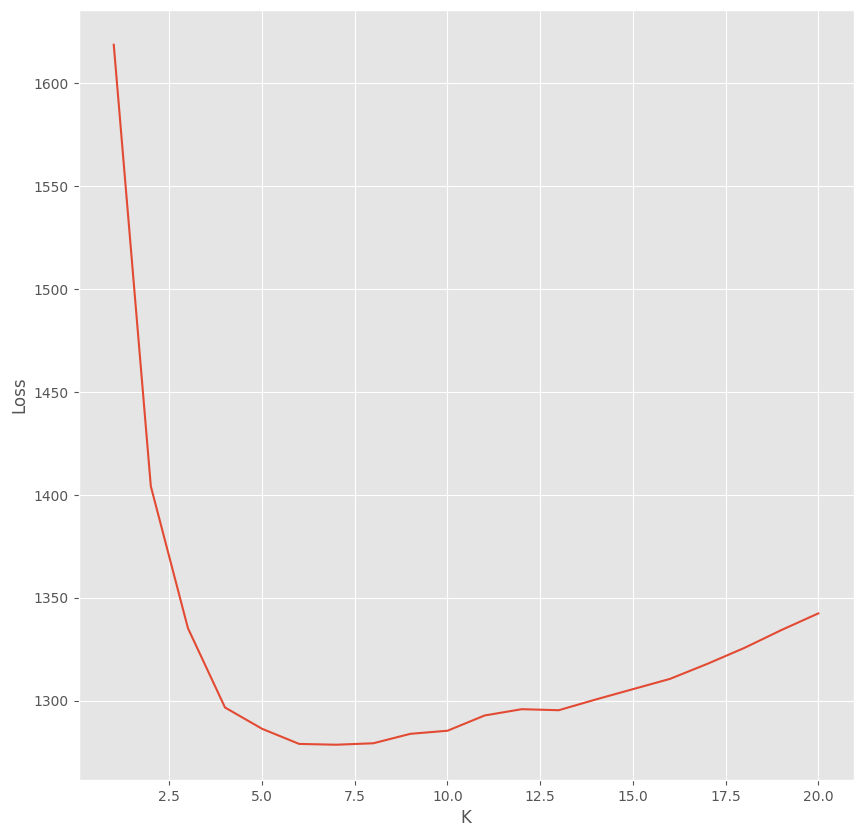

Minimum error 1278.5816281094171 is at k = 6


In [12]:
rmse_val = []

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val)
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)))

## Exercises

1. Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.
2. Explore other loss functions and try to understand when and why they are used.
3. Try out KNN-regression on other datasets see which values of K give the best results.
4. Try exploring what will happen if K is set to 1 or K is set to size of whole training dataset.

EXERCISES: 1
------------------
ANSWER
----------

In [13]:
errors = {
    "mse": [],
    "mae": [],
    "rmse": []
}

for k in range(1,21):
  model = neighbors.KNeighborsRegressor(n_neighbors = k)
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  mse = mean_squared_error(y_test, pred)
  errors["mse"].append(mse)
  errors["mae"].append(mean_squared_error(y_test, pred))
  errors["rmse"].append(mse**0.5)

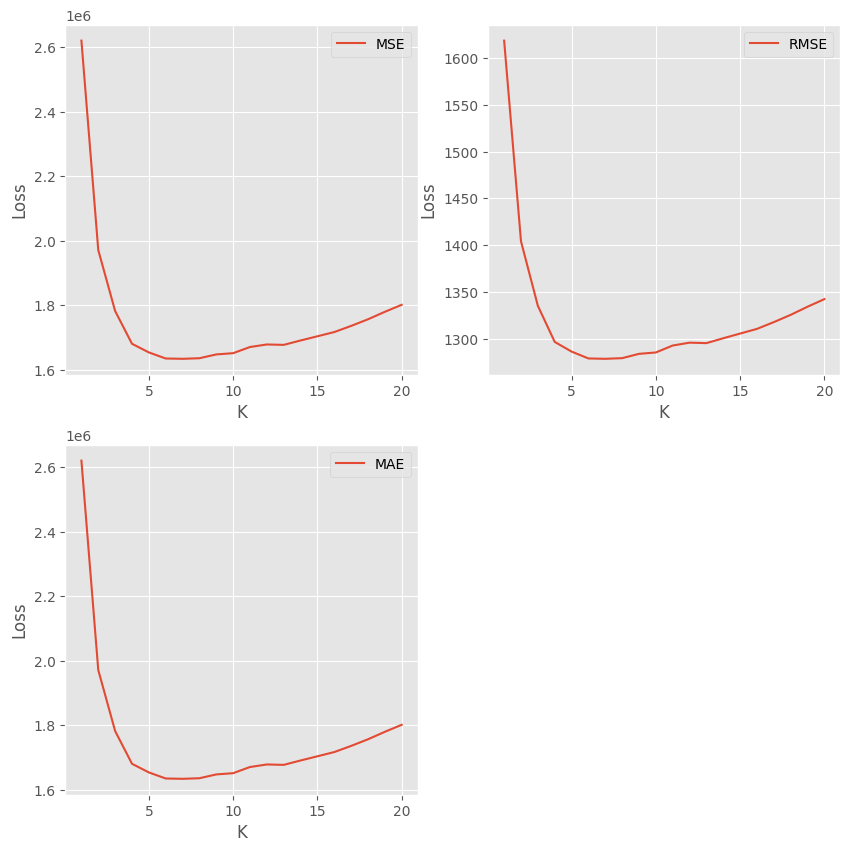

[MSE] Minimum error 1634770.9797389277 is at k = 6
[RMSE] Minimum error 1278.5816281094171 is at k = 6
[MAE] Minimum error 1634770.9797389277 is at k = 6


In [14]:
figure = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.plot(np.arange(1,21),errors["mse"], label="MSE")
plt.legend()
plt.xlabel("K")
plt.ylabel("Loss")

plt.subplot(2, 2, 2)
plt.plot(np.arange(1,21),errors["rmse"], label="RMSE")
plt.legend()
plt.xlabel("K")
plt.ylabel("Loss")

plt.subplot(2, 2, 3)
plt.plot(np.arange(1,21),errors["mae"], label="MAE")
plt.legend()
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

errors["mse"] = np.asarray(errors["mse"])
errors["rmse"] = np.asarray(errors["rmse"])
errors["mae"] = np.asarray(errors["mae"])
print("[MSE] Minimum error {} is at k = {}".format(np.min(errors["mse"]), np.argmin(errors["mse"])))
print("[RMSE] Minimum error {} is at k = {}".format(np.min(errors["rmse"]), np.argmin(errors["rmse"])))
print("[MAE] Minimum error {} is at k = {}".format(np.min(errors["mae"]), np.argmin(errors["mae"])))

EXERCISE:2
------------
ANSWER
-----
Exploring loss functions is critical because they directly influence how well your machine learning models learn patterns and generalize to new data. Here's a breakdown of common loss functions, their applications, and reasons for their usage:




1. Mean Squared Error (MSE)

Formula:

Use Case: Regression problems.

Why Use It:

Penalizes larger errors more than smaller ones due to squaring.

Works well when the target values are continuous and errors are symmetrically distributed.






2. Mean Absolute Error (MAE)

Formula:

Use Case: Regression problems.

Why Use It:

Robust to outliers because it doesn’t square the error.

Focuses on minimizing the absolute error regardless of its direction.






3. Huber Loss

Formula:


L_{\delta}(a) =
     \begin{cases}
       \frac{1}{2}(a^2) & \text{for } |a| \leq \delta, \\
       \delta(|a| - \frac{1}{2}\delta) & \text{for } |a| > \delta
     \end{cases}

Why Use It:

Combines the strengths of MSE and MAE.

Less sensitive to outliers than MSE and behaves like MAE for large errors.






4. Cross-Entropy Loss (Log Loss)

Formula:

Use Case: Classification problems (binary or multi-class).

Why Use It:

Directly linked to probability theory (log-likelihood).

Encourages the model to predict probabilities close to 0 or 1.






5. Categorical Cross-Entropy

Formula:

Use Case: Multi-class classification problems.

Why Use It:

Useful when output is a probability distribution (softmax).






6. Kullback-Leibler (KL) Divergence

Formula:

Use Case: Comparing probability distributions.

Why Use It:

Measures how one probability distribution diverges from another.

Useful for tasks like variational autoencoders or reinforcement learning.






7. Hinge Loss

Formula:

Use Case: Binary classification with Support Vector Machines (SVM).

Why Use It:

Encourages a margin of separation between classes.

Works well with linear classifiers.






8. Focal Loss

Formula:

Use Case: Imbalanced classification tasks.

Why Use It:

Focuses more on hard-to-classify examples.

Helps in scenarios where one class is dominant.






9. Contrastive Loss

Formula:

Use Case: Metric learning, Siamese networks.

Why Use It:

Helps models learn to differentiate between similar and dissimilar data points.






10. Triplet Loss

Formula:

Use Case: Face recognition, recommendation systems.

Why Use It:

Encourages the distance between anchor-positive pairs to be smaller than anchor-negative pairs.






11. Custom Loss Functions

Use Case: When the problem has specific needs.

Why Use It:

Flexibility to optimize for business-specific objectives, e.g., F1 score, or domain-specific constraints.






How to Choose a Loss Function

1. Data Type:

Regression: MSE, MAE, or Huber Loss.

Classification: Cross-Entropy or Hinge Loss.



2. Robustness to Outliers:

Use MAE, Huber, or custom loss if outliers are significant.



3. Class Imbalance:

Use Focal Loss or re-weighted Cross-Entropy.



4. Distribution Comparisons:

Use KL Divergence or specialized loss functions.




Would you like to dive deeper into any specific loss function or explore a particular domain?

In [15]:

import numpy as np

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Example
y_true = np.array([1.0, 2.0, 3.0])
y_pred = np.array([1.1, 1.9, 3.2])
print("MSE:", mse(y_true, y_pred))

MSE: 0.020000000000000035


In [16]:

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Example
print("MAE:", mae(y_true, y_pred))

MAE: 0.13333333333333344


In [17]:

def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * error ** 2
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.mean(np.where(is_small_error, squared_loss, linear_loss))

# Example
print("Huber Loss:", huber_loss(y_true, y_pred))

Huber Loss: 0.010000000000000018


In [18]:

def binary_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # Avoid log(0)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Example
y_true = np.array([1, 0, 1])
y_pred = np.array([0.9, 0.2, 0.7])
print("Binary Cross-Entropy:", binary_cross_entropy(y_true, y_pred))

Binary Cross-Entropy: 0.22839300363692283


In [19]:

def categorical_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]

# Example
y_true = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
y_pred = np.array([[0.8, 0.1, 0.1], [0.2, 0.7, 0.1], [0.1, 0.2, 0.7]])
print("Categorical Cross-Entropy:", categorical_cross_entropy(y_true, y_pred))

Categorical Cross-Entropy: 0.3121644797305582


In [20]:

def hinge_loss(y_true, y_pred):
    return np.mean(np.maximum(0, 1 - y_true * y_pred))

# Example
y_true = np.array([1, -1, 1])
y_pred = np.array([0.8, -0.9, 0.7])
print("Hinge Loss:", hinge_loss(y_true, y_pred))

Hinge Loss: 0.19999999999999998


In [21]:

def focal_loss(y_true, y_pred, gamma=2.0, alpha=0.25):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    loss = -alpha * (1 - y_pred) ** gamma * y_true * np.log(y_pred) - \
           (1 - alpha) * y_pred ** gamma * (1 - y_true) * np.log(1 - y_pred)
    return np.mean(loss)

# Example
y_true = np.array([1, 0, 1])
y_pred = np.array([0.9, 0.2, 0.7])
print("Focal Loss:", focal_loss(y_true, y_pred))

Focal Loss: 0.004994298022397447


In [22]:

def triplet_loss(anchor, positive, negative, alpha=0.2):
    pos_dist = np.sum((anchor - positive) ** 2, axis=1)
    neg_dist = np.sum((anchor - negative) ** 2, axis=1)
    loss = np.maximum(0, pos_dist - neg_dist + alpha)
    return np.mean(loss)

# Example
anchor = np.array([[1.0, 2.0], [2.0, 3.0]])
positive = np.array([[1.1, 2.1], [2.1, 3.1]])
negative = np.array([[3.0, 4.0], [0.0, 1.0]])
print("Triplet Loss:", triplet_loss(anchor, positive, negative))

Triplet Loss: 0.0


EXERCISE:3
-------------
ANSWER
--------
To evaluate the performance of K-Nearest Neighbors Regression (KNN) on various datasets and test different values of , we can follow these steps:




Steps to Experiment:

1. Choose Datasets: Use common regression datasets, e.g., Boston Housing, Diabetes, or custom datasets (from scikit-learn or external sources).


2. Preprocess Data: Normalize features since KNN is distance-based.


3. Train-Test Split: Use a split ratio (e.g., 80-20) or cross-validation.


4. Model Training: Apply KNN regression with multiple values of  and evaluate.


5. Evaluation Metric: Use metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), or -Score to determine the best .






Here’s Python code to perform the experiment:

In [23]:

import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load dataset
X, y = load_diabetes(return_X_y=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Test different values of K
k_values = range(1, 11)  # Test K from 1 to 10
mse_scores = []

for k in k_values:
    # Train KNN regressor
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict and calculate MSE
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    print(f"K={k}, MSE={mse:.4f}")

# Find the best K
best_k = k_values[np.argmin(mse_scores)]
print(f"\nBest K: {best_k}, Lowest MSE: {min(mse_scores):.4f}")

K=1, MSE=4939.1685
K=2, MSE=3659.0590
K=3, MSE=3287.0275
K=4, MSE=3266.4544
K=5, MSE=3047.4499
K=6, MSE=2891.3390
K=7, MSE=2969.5237
K=8, MSE=2960.7100
K=9, MSE=3070.9681
K=10, MSE=3168.3534

Best K: 6, Lowest MSE: 2891.3390


EXERCISE:4
----------
ANSWER
-------
In machine learning, -Nearest Neighbors (-NN) is an algorithm that predicts the output for a query point based on the majority vote or average of its  nearest neighbors in the training dataset. Adjusting the value of  affects the behavior of the algorithm:




1. If :

The model simply assigns the label of the single nearest neighbor to the query point.

Advantages:

The model captures local patterns very well.

It can perfectly memorize the training data, achieving 100% accuracy on the training set.


Disadvantages:

Extremely sensitive to noise. If a training point is mislabeled or an outlier, it can incorrectly influence the prediction.

Likely to overfit, as it doesn't generalize well to unseen data.






2. If  is set to the size of the whole training dataset ():

The prediction is based on all the training points, essentially computing the majority vote (for classification) or the mean (for regression) of the entire dataset.

Advantages:

Extremely robust to noise and outliers, as no single point dominates the prediction.

Represents a global average of the dataset, ensuring smooth predictions.


Disadvantages:

Completely ignores local patterns and structure in the data.

Reduces the model to a very simple form, potentially underfitting the data.

For classification, this results in predicting the most common class across the entire dataset, regardless of the input features.






Summary of Trade-Offs:

: High variance, low bias (overfits and captures noise).

: Low variance, high bias (underfits and oversimplifies).


In practice, choosing  involves a tradeoff between overfitting and underfitting, and it is often determined using techniques like cross-validation to find an optimal value.

Accuracy with K=1: 0.87
Accuracy with K=140: 0.47


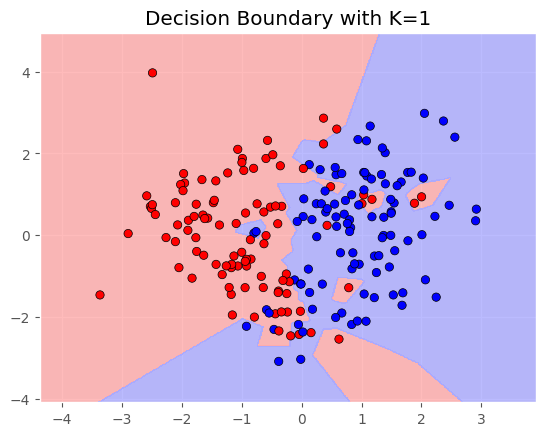

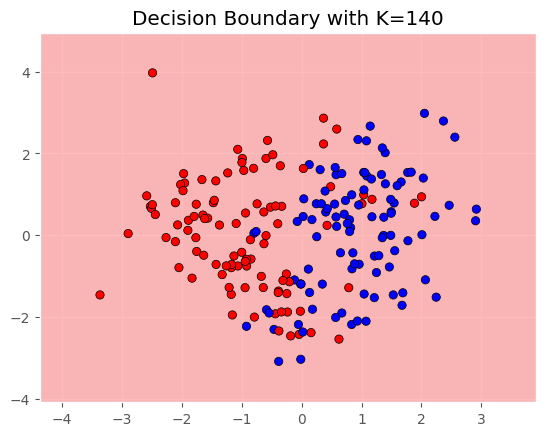

In [24]:

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(
    n_samples=200, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42
)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Case 1: K = 1
knn_k1 = KNeighborsClassifier(n_neighbors=1)
knn_k1.fit(X_train, y_train)
y_pred_k1 = knn_k1.predict(X_test)
accuracy_k1 = accuracy_score(y_test, y_pred_k1)
print(f"Accuracy with K=1: {accuracy_k1:.2f}")

# Case 2: K = size of the training dataset
k_n = len(X_train)
knn_kn = KNeighborsClassifier(n_neighbors=k_n)
knn_kn.fit(X_train, y_train)
y_pred_kn = knn_kn.predict(X_test)
accuracy_kn = accuracy_score(y_test, y_pred_kn)
print(f"Accuracy with K={k_n}: {accuracy_kn:.2f}")

# Visualizing the decision boundaries
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(["#FFAAAA", "#AAAAFF"]))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=ListedColormap(["#FF0000", "#0000FF"]))
    plt.title(title)
    plt.show()

# Plot decision boundary for K=1
plot_decision_boundary(knn_k1, X, y, "Decision Boundary with K=1")

# Plot decision boundary for K=n
plot_decision_boundary(knn_kn, X, y, f"Decision Boundary with K={k_n}")

## References ##
1. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
2. https://www.geeksforgeeks.org/k-nearest-neighbours/
3. https://bookdown.org/tpinto_home/Regression-and-Classification/k-nearest-neighbours-regression.html#:~:text=KNN%20regression%20is%20a%20non,observations%20in%20the%20same%20neighbourhood